In [ ]:
"""Phần 1: Xác thực chéo - Nghệ thuật đánh giá khách quan
Hiểu về xác thực chéo
Xác thực chéo là một kỹ thuật đánh giá mô hình bằng cách chia dữ liệu thành nhiều phần và kiểm tra mô hình trên các phần khác nhau. 
Điều này giống như việc một giáo viên không chỉ kiểm tra học sinh bằng một bài thi mà còn bằng nhiều bài kiểm tra khác nhau để đảm bảo
đánh giá chính xác.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
import warnings
warnings.filterwarnings('ignore')

def tao_du_lieu_mau():
    """
    Tạo dữ liệu mẫu để minh họa các khái niệm
    """
    # Tạo dữ liệu phân loại
    X_class, y_class = make_classification(n_samples=1000, n_features=20, n_informative=10, 
                                          n_redundant=10, n_clusters_per_class=1, random_state=42)
    
    # Tạo dữ liệu hồi quy
    X_reg, y_reg = make_regression(n_samples=1000, n_features=20, n_informative=10, 
                                  noise=0.1, random_state=42)
    
    return X_class, y_class, X_reg, y_reg

def minh_hoa_xac_thuc_cheo():
    """
    Minh họa các loại xác thực chéo khác nhau
    """
    print("=== MINH HỌA XÁC THỰC CHÉO ===")
    
    # Tạo dữ liệu mẫu
    X, y, _, _ = tao_du_lieu_mau()
    
    # Chia dữ liệu train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Tạo mô hình đơn giản
    model = LogisticRegression(random_state=42)
    
    print("1. Đánh giá đơn giản (train/test split):")
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"   Điểm trên tập huấn luyện: {train_score:.4f}")
    print(f"   Điểm trên tập kiểm tra: {test_score:.4f}")
    
    print("\n2. Xác thực chéo K-Fold (K=5):")
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold)
    print(f"   Điểm qua 5 fold: {cv_scores}")
    print(f"   Điểm trung bình: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    print("\n3. Xác thực chéo phân tầng (Stratified K-Fold):")
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    stratified_scores = cross_val_score(model, X_train, y_train, cv=stratified_kfold)
    print(f"   Điểm qua 5 fold phân tầng: {stratified_scores}")
    print(f"   Điểm trung bình: {stratified_scores.mean():.4f} (+/- {stratified_scores.std() * 2:.4f})")
    
    print("\n4. Leave-One-Out Cross-Validation (LOO-CV):")
    # Chỉ sử dụng 100 mẫu đầu tiên vì LOO-CV chậm
    X_small = X_train[:100]
    y_small = y_train[:100]
    loo = LeaveOneOut()
    loo_scores = cross_val_score(model, X_small, y_small, cv=loo)
    print(f"   Điểm LOO-CV (100 mẫu): {loo_scores.mean():.4f} (+/- {loo_scores.std() * 2:.4f})")
    
    return cv_scores, stratified_scores

# Chạy minh họa xác thực chéo
cv_scores, stratified_scores = minh_hoa_xac_thuc_cheo()

=== MINH HỌA XÁC THỰC CHÉO ===
1. Đánh giá đơn giản (train/test split):
   Điểm trên tập huấn luyện: 0.9675
   Điểm trên tập kiểm tra: 0.9550

2. Xác thực chéo K-Fold (K=5):
   Điểm qua 5 fold: [0.975   0.975   0.95625 0.94375 0.975  ]
   Điểm trung bình: 0.9650 (+/- 0.0257)

3. Xác thực chéo phân tầng (Stratified K-Fold):
   Điểm qua 5 fold phân tầng: [0.975   0.98125 0.95625 0.93125 0.98125]
   Điểm trung bình: 0.9650 (+/- 0.0384)

4. Leave-One-Out Cross-Validation (LOO-CV):
   Điểm LOO-CV (100 mẫu): 0.9600 (+/- 0.3919)


=== ĐÁNH GIÁ K-FOLD VỚI CÁC GIÁ TRỊ K KHÁC NHAU ===
K=3: 0.9620 (+/- 0.0057)
      Min: 0.9580, Max: 0.9641
K=5: 0.9620 (+/- 0.0102)
      Min: 0.9550, Max: 0.9700
K=7: 0.9630 (+/- 0.0244)
      Min: 0.9441, Max: 0.9720
K=10: 0.9620 (+/- 0.0332)
      Min: 0.9300, Max: 0.9800

=== SO SÁNH CÁC PHƯƠNG PHÁP XÁC THỰC CHÉO ===
K-Fold (5 fold): 0.9620 (+/- 0.0102)
Stratified K-Fold (5 fold): 0.9610 (+/- 0.0279)


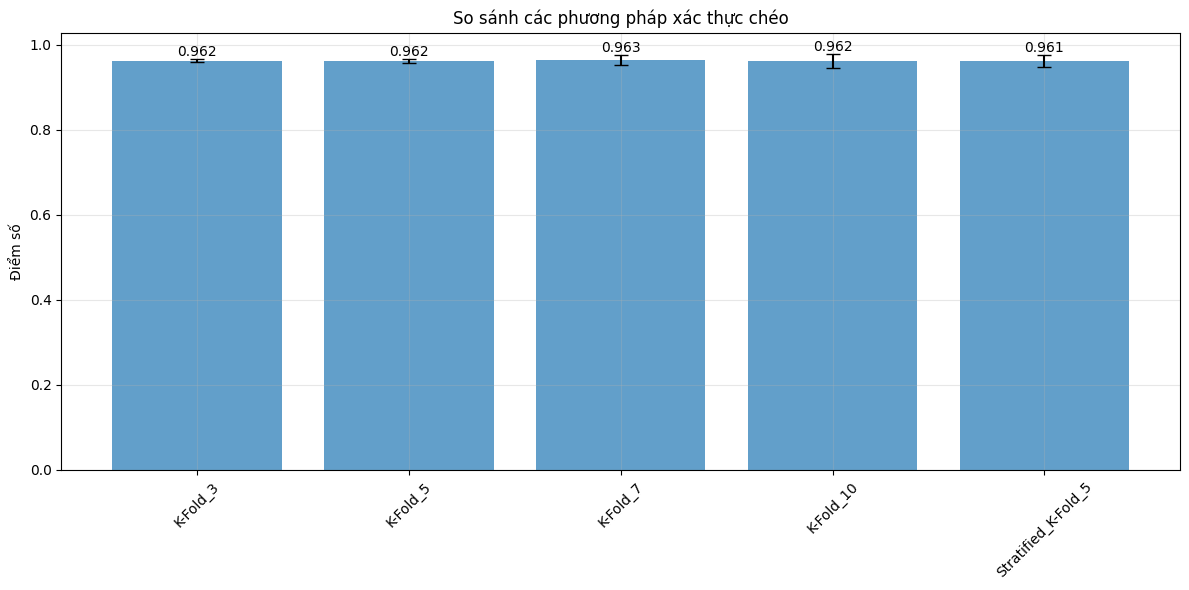

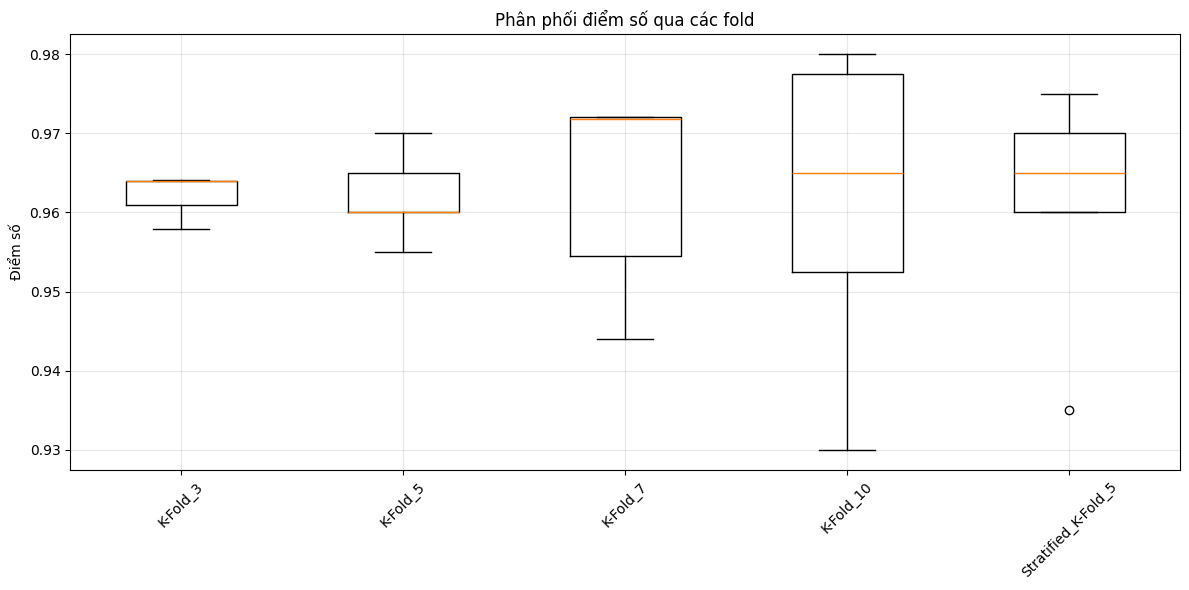

In [2]:
"""
Lựa chọn phương pháp xác thực chéo phù hợp
Mỗi phương pháp xác thực chéo có ưu nhược điểm riêng và phù hợp với tình huống khác nhau. Việc lựa chọn đúng phương pháp sẽ cho bạn đánh giá chính xác nhất về hiệu suất mô hình.

Tại sao cần lựa chọn phương pháp xác thực chéo phù hợp?
    Mỗi phương pháp xác thực chéo có trade-off khác nhau giữa:
    1. Bias (độ thiên lệch): Sai số do ước lượng không chính xác
    2. Variance (độ biến thiên): Sai số do kết quả không ổn định
    3. Computational cost (chi phí tính toán): Thời gian và tài nguyên
"""
class BoDanhGiaXacThucCheo:
    """
    Bộ công cụ đánh giá với nhiều phương pháp xác thực chéo
    """
    
    def __init__(self, model, X, y):
        self.model = model
        self.X = X
        self.y = y
        self.ket_qua = {}
    
    def danh_gia_k_fold(self, k_values=[3, 5, 10]):
        """
        Đánh giá với các giá trị K khác nhau
        """
        print("=== ĐÁNH GIÁ K-FOLD VỚI CÁC GIÁ TRỊ K KHÁC NHAU ===")
        
        for k in k_values:
            kfold = KFold(n_splits=k, shuffle=True, random_state=42)
            scores = cross_val_score(self.model, self.X, self.y, cv=kfold)
            
            self.ket_qua[f'K-Fold_{k}'] = {
                'scores': scores,
                'mean': scores.mean(),
                'std': scores.std(),
                'min': scores.min(),
                'max': scores.max()
            }
            
            print(f"K={k}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
            print(f"      Min: {scores.min():.4f}, Max: {scores.max():.4f}")
    
    def so_sanh_phuong_phap(self):
        """
        So sánh các phương pháp xác thực chéo khác nhau
        """
        print("\n=== SO SÁNH CÁC PHƯƠNG PHÁP XÁC THỰC CHÉO ===")
        
        # K-Fold thông thường
        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        kfold_scores = cross_val_score(self.model, self.X, self.y, cv=kfold)
        
        # Stratified K-Fold (nếu là bài toán phân loại)
        if len(np.unique(self.y)) < 20:  # Có thể là bài toán phân loại
            stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            stratified_scores = cross_val_score(self.model, self.X, self.y, cv=stratified_kfold)
        else:
            stratified_scores = None
        
        # Lưu kết quả
        self.ket_qua['K-Fold_5'] = {
            'scores': kfold_scores,
            'mean': kfold_scores.mean(),
            'std': kfold_scores.std()
        }
        
        if stratified_scores is not None:
            self.ket_qua['Stratified_K-Fold_5'] = {
                'scores': stratified_scores,
                'mean': stratified_scores.mean(),
                'std': stratified_scores.std()
            }
        
        # In kết quả
        print(f"K-Fold (5 fold): {kfold_scores.mean():.4f} (+/- {kfold_scores.std() * 2:.4f})")
        if stratified_scores is not None:
            print(f"Stratified K-Fold (5 fold): {stratified_scores.mean():.4f} (+/- {stratified_scores.std() * 2:.4f})")
    
    def ve_bieu_do_ket_qua(self):
        """
        Vẽ biểu đồ so sánh kết quả
        """
        if not self.ket_qua:
            print("Chưa có kết quả để vẽ biểu đồ")
            return
        
        # Chuẩn bị dữ liệu cho biểu đồ
        phuong_phap = list(self.ket_qua.keys())
        diem_trung_binh = [self.ket_qua[pp]['mean'] for pp in phuong_phap]
        do_lech_chuan = [self.ket_qua[pp]['std'] for pp in phuong_phap]
        
        # Vẽ biểu đồ
        plt.figure(figsize=(12, 6))
        
        # Biểu đồ cột với error bars
        bars = plt.bar(phuong_phap, diem_trung_binh, yerr=do_lech_chuan, capsize=5, alpha=0.7)
        
        # Thêm giá trị lên đầu cột
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + do_lech_chuan[i],
                    f'{diem_trung_binh[i]:.3f}', ha='center', va='bottom')
        
        plt.title('So sánh các phương pháp xác thực chéo')
        plt.ylabel('Điểm số')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Vẽ boxplot để thấy phân phối điểm
        plt.figure(figsize=(12, 6))
        all_scores = [self.ket_qua[pp]['scores'] for pp in phuong_phap]
        plt.boxplot(all_scores, labels=phuong_phap)
        plt.title('Phân phối điểm số qua các fold')
        plt.ylabel('Điểm số')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# Minh họa sử dụng bộ đánh giá
X_class, y_class, _, _ = tao_du_lieu_mau()
model = LogisticRegression(random_state=42)

bo_danh_gia = BoDanhGiaXacThucCheo(model, X_class, y_class)
bo_danh_gia.danh_gia_k_fold([3, 5, 7, 10])
bo_danh_gia.so_sanh_phuong_phap()
bo_danh_gia.ve_bieu_do_ket_qua()

In [3]:
"""
Phần 2: Tối ưu siêu tham số - Tìm kiếm cấu hình tối ưu
Hiểu về siêu tham số
Siêu tham số là những tham số mà chúng ta phải thiết lập trước khi huấn luyện mô hình, khác với các tham số được học trong quá trình huấn luyện. 
Hãy tưởng tượng siêu tham số như việc điều chỉnh chiếc radio - bạn cần tìm đúng tần số để nhận được tín hiệu rõ nhất.
"""
def minh_hoa_toi_uu_sieu_tham_so():
    """
    Minh họa các phương pháp tối ưu siêu tham số
    """
    print("=== TỐI ƯU SIÊU THAM SỐ ===")
    
    # Tạo dữ liệu
    X, y, _, _ = tao_du_lieu_mau()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("1. Tìm kiếm lưới (Grid Search):")
    
    # Định nghĩa không gian tìm kiếm cho Random Forest
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Random Forest với Grid Search
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(
        rf, param_grid, cv=5, scoring='accuracy', 
        n_jobs=-1, verbose=1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    print(f"   Tham số tốt nhất: {grid_search.best_params_}")
    print(f"   Điểm tốt nhất: {grid_search.best_score_:.4f}")
    
    # Đánh giá trên tập test
    grid_test_score = grid_search.score(X_test_scaled, y_test)
    print(f"   Điểm trên tập test: {grid_test_score:.4f}")
    
    print("\n2. Tìm kiếm ngẫu nhiên (Random Search):")
    
    # Random Search với cùng không gian tham số
    random_search = RandomizedSearchCV(
        rf, param_grid, n_iter=20, cv=5, scoring='accuracy',
        random_state=42, n_jobs=-1, verbose=1
    )
    
    random_search.fit(X_train_scaled, y_train)
    
    print(f"   Tham số tốt nhất: {random_search.best_params_}")
    print(f"   Điểm tốt nhất: {random_search.best_score_:.4f}")
    
    # Đánh giá trên tập test
    random_test_score = random_search.score(X_test_scaled, y_test)
    print(f"   Điểm trên tập test: {random_test_score:.4f}")
    
    return grid_search, random_search

# Chạy minh họa tối ưu siêu tham số
grid_search, random_search = minh_hoa_toi_uu_sieu_tham_so()

=== TỐI ƯU SIÊU THAM SỐ ===
1. Tìm kiếm lưới (Grid Search):
Fitting 5 folds for each of 108 candidates, totalling 540 fits
   Tham số tốt nhất: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
   Điểm tốt nhất: 0.9750
   Điểm trên tập test: 0.9850

2. Tìm kiếm ngẫu nhiên (Random Search):
Fitting 5 folds for each of 20 candidates, totalling 100 fits
   Tham số tốt nhất: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
   Điểm tốt nhất: 0.9725
   Điểm trên tập test: 0.9850
